In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.table as table
import math
import scipy
import scipy.stats
from scipy import signal

In [3]:
#importing the cleaned data from the exoplanet observation
measurements = table.Table.read('/Users/astrocom/Desktop/CRSP/CoRoT-2b/Measurements.csv')

In [4]:
#calculating the instrumental magnitude from the measurements given and adding it as a new column at the end of the table
measurements['mag']=(-2.5*np.log(measurements['rel_flux_T1'])+2.5*np.log(measurements['rel_flux_C2']))+10.7

In [5]:
#displaying the table and visual verification that the new column was added
measurements

col0,Label,slice,Saturated,J.D.-2400000,JD_UTC,JD_SOBS,JD_MOBS,HJD_MOBS,BJD_MOBS,ALT_OBJ,AIRMASS,Source_Radius,Sky_Rad(min),Sky_Rad(max),rel_flux_T1,rel_flux_C2,rel_flux_C3,rel_flux_C4,rel_flux_C5,rel_flux_C6,rel_flux_C7,rel_flux_C8,rel_flux_C9,rel_flux_C10,rel_flux_C11,rel_flux_C12,rel_flux_err_T1,rel_flux_err_C2,rel_flux_err_C3,rel_flux_err_C4,rel_flux_err_C5,rel_flux_err_C6,rel_flux_err_C7,rel_flux_err_C8,rel_flux_err_C9,rel_flux_err_C10,rel_flux_err_C11,rel_flux_err_C12,rel_flux_SNR_T1,rel_flux_SNR_C2,rel_flux_SNR_C3,rel_flux_SNR_C4,rel_flux_SNR_C5,rel_flux_SNR_C6,rel_flux_SNR_C7,rel_flux_SNR_C8,rel_flux_SNR_C9,rel_flux_SNR_C10,rel_flux_SNR_C11,rel_flux_SNR_C12,tot_C_cnts,tot_C_err,X(IJ)_T1,Y(IJ)_T1,X(FITS)_T1,Y(FITS)_T1,Source-Sky_T1,Source_Error_T1,Source_SNR_T1,Peak_T1,Mean_T1,Sky/Pixel_T1,Width_T1,X-Width_T1,Y-Width_T1,X(IJ)_C2,Y(IJ)_C2,X(FITS)_C2,Y(FITS)_C2,Source-Sky_C2,Source_Error_C2,Source_SNR_C2,Peak_C2,Mean_C2,Sky/Pixel_C2,Width_C2,X-Width_C2,Y-Width_C2,X(IJ)_C3,Y(IJ)_C3,X(FITS)_C3,Y(FITS)_C3,Source-Sky_C3,Source_Error_C3,Source_SNR_C3,Peak_C3,Mean_C3,Sky/Pixel_C3,Width_C3,X-Width_C3,Y-Width_C3,X(IJ)_C4,Y(IJ)_C4,X(FITS)_C4,Y(FITS)_C4,Source-Sky_C4,Source_Error_C4,Source_SNR_C4,Peak_C4,Mean_C4,Sky/Pixel_C4,Width_C4,X-Width_C4,Y-Width_C4,X(IJ)_C5,Y(IJ)_C5,X(FITS)_C5,Y(FITS)_C5,Source-Sky_C5,Source_Error_C5,Source_SNR_C5,Peak_C5,Mean_C5,Sky/Pixel_C5,Width_C5,X-Width_C5,Y-Width_C5,X(IJ)_C6,Y(IJ)_C6,X(FITS)_C6,Y(FITS)_C6,Source-Sky_C6,Source_Error_C6,Source_SNR_C6,Peak_C6,Mean_C6,Sky/Pixel_C6,Width_C6,X-Width_C6,Y-Width_C6,X(IJ)_C7,Y(IJ)_C7,X(FITS)_C7,Y(FITS)_C7,Source-Sky_C7,Source_Error_C7,Source_SNR_C7,Peak_C7,Mean_C7,Sky/Pixel_C7,Width_C7,X-Width_C7,Y-Width_C7,X(IJ)_C8,Y(IJ)_C8,X(FITS)_C8,Y(FITS)_C8,Source-Sky_C8,Source_Error_C8,Source_SNR_C8,Peak_C8,Mean_C8,Sky/Pixel_C8,Width_C8,X-Width_C8,Y-Width_C8,X(IJ)_C9,Y(IJ)_C9,X(FITS)_C9,Y(FITS)_C9,Source-Sky_C9,Source_Error_C9,Source_SNR_C9,Peak_C9,Mean_C9,Sky/Pixel_C9,Width_C9,X-Width_C9,Y-Width_C9,X(IJ)_C10,Y(IJ)_C10,X(FITS)_C10,Y(FITS)_C10,Source-Sky_C10,Source_Error_C10,Source_SNR_C10,Peak_C10,Mean_C10,Sky/Pixel_C10,Width_C10,X-Width_C10,Y-Width_C10,X(IJ)_C11,Y(IJ)_C11,X(FITS)_C11,Y(FITS)_C11,Source-Sky_C11,Source_Error_C11,Source_SNR_C11,Peak_C11,Mean_C11,Sky/Pixel_C11,Width_C11,X-Width_C11,Y-Width_C11,X(IJ)_C12,Y(IJ)_C12,X(FITS)_C12,Y(FITS)_C12,Source-Sky_C12,Source_Error_C12,Source_SNR_C12,Peak_C12,Mean_C12,Sky/Pixel_C12,Width_C12,X-Width_C12,Y-Width_C12,mag
int64,str33,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,fl

In [6]:
#identifying and creating the variables that will be used
m = measurements['mag']
t = np.arange(0., 195., .365)

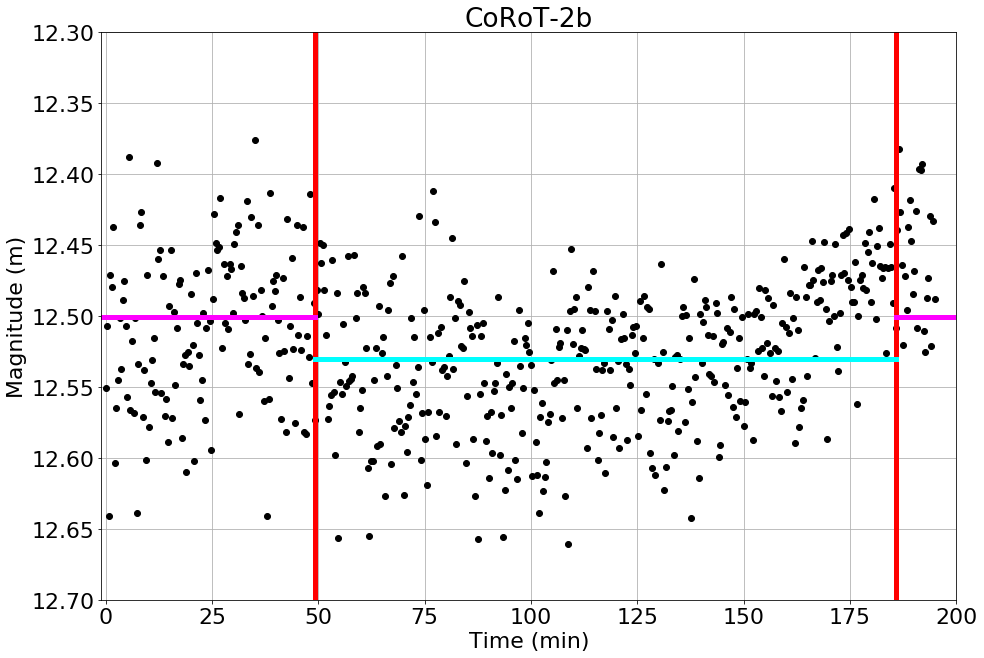

In [14]:
#plotting what is known as  a lightcurve (a measurment of observed light versus time)
#changes in the lightcurve tell you about changes in the brightness of the star at the time the image was taken
#the red lines indicate when a known exoplanet started passing in front of a star, and when it finished (also known as a transit)
#the magenta lines is the mean of all of the points before and after the transit
#the cyan line is the mean of all of the data points during the transit
#if the difference between a the magenta line and the cyan line is within known parameters, a transit is succesfully detected
#spoiler alert: this transit was successfully detected (:
plt.plot(t, m, 'ko')
plt.gca().invert_yaxis()
plt.xlabel('Time (min)')
plt.ylabel('Magnitude (m)')
plt.title('CoRoT-2b')
plt.plot([49.3, 49.3], [12,14.5], color='red', linewidth=5)
plt.plot([185.8, 185.8], [12,14.5], color='red', linewidth=5)
plt.plot([49.3,185.8],[measurements['mag'][135:508].mean(),measurements['mag'][135:508].mean()],color='cyan', linewidth=5)
plt.plot([-100, 49.3],[new.mean(),new.mean()],color='magenta', linewidth=5)
plt.plot([185.8,1000],[new.mean(),new.mean()],color='magenta', linewidth=5)
plt.ylim(12.7, 12.3)
plt.xlim(-1, 200)
plt.grid(True)
plt.rcParams["figure.figsize"] = (15.32,10.44)
plt.rcParams.update({'font.size': 22})
plt.show()

In [10]:
#setting up the statistical analysis 
before = np.array(measurements['mag'][0:135])
after = np.array(measurements['mag'][509:])
new = np.append(before,after)
print(new.mean(),new.std()/np.sqrt(len(new)))

print(measurements['mag'][135:509].mean(),measurements['mag'][135:509].std()/np.sqrt(509-136))
print(new.mean()-measurements['mag'][135:509].mean())

12.500764759722184 0.0043972351970664
12.5299097134531 0.0025584121461831194
-0.02914495373091519


In [12]:
#using a stats package from scipi to find the statistical significance of the transit using the Students t-test
scipy.stats.ttest_ind(before,after, axis=0, equal_var=False, nan_policy='propagate')

Ttest_indResult(statistic=4.995082350800635, pvalue=1.1061523172416225e-05)